# EE 5020 Homework 1: Pandas and Writing Practice

Name: Farzana Yasmin Boby 

CIN: 401413256

## Overview

In this homework, you will practice writing some Python code and using the Python data analysis libraries (seaborn, pandas, numpy, matplotlib).  You will analyze one of the example datasets we have in the `as_datasets` folder, `hof.csv`.  This dataset  is based on the number of hits of a baseball player in their career and whether or not they are in the Hall of Fame.  The dataset contains two columns, "Hits" and "HOF".

## Section 1: Python Practice

First, import the following libraries with usable names:
- pandas
- matplotlib.pyplot
- seaborn
- numpy

Importing pandas, matplotlib.pyplot, seaborn and numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Next, use pandas' `read_csv` function to import the CSV as a DataFrame, with a friendly, descriptive name:

In [2]:
df_hof = pd.read_csv("../as_datasets/hof.csv")
print(df_hof.head())


   Hits  HOF
0   972    0
1   989    0
2  1007    0
3  1030    0
4  1041    0


Rename the column "Hits" to "no_of_hits" and "HOF" to "hall_of_fame"

In [3]:
df_hof['no_of_hits'] = df_hof['Hits']
df_hof['hall_of_fame'] = df_hof['HOF']
df_hof = df_hof[['no_of_hits', 'hall_of_fame']]
print(df_hof.head())

   no_of_hits  hall_of_fame
0         972             0
1         989             0
2        1007             0
3        1030             0
4        1041             0


Now, let's get some preliminary information and descriptive statistics (count, mean, standard deviation, min, max, quartiles) about our dataset:

Getting description of the players number of hits and hall of fame

In [4]:
print(df_hof.head())
print(df_hof['no_of_hits'].describe())
print(df_hof['hall_of_fame'].describe())

   no_of_hits  hall_of_fame
0         972             0
1         989             0
2        1007             0
3        1030             0
4        1041             0
count     774.000000
mean     1719.957364
std       532.603682
min       972.000000
25%      1316.000000
50%      1566.000000
75%      2011.000000
max      4256.000000
Name: no_of_hits, dtype: float64
count    774.000000
mean       0.182171
std        0.386235
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hall_of_fame, dtype: float64


Now, getting some other descriptive statistics (count, mean, standard deviation, min, max, quartiles) of the players no. of hits and hall of fame manually

In [5]:
mean_of_hits = df_hof['no_of_hits'].mean()
print(f'The mean of the no. of hits is: {mean_of_hits}')
count_of_hits = df_hof['no_of_hits'].count()
print(f'The counts of the no. of hits is: {count_of_hits}')
mean_of_HOF = df_hof['hall_of_fame'].mean()
print(f'The mean of the hall of fame is: {mean_of_HOF}')
count_of_HOF = df_hof['hall_of_fame'].count()
print(f'The counts of the HOF is: {count_of_HOF}')

variance_of_hits = np.sum(np.square(df_hof['no_of_hits'] - mean_of_hits) / count_of_hits)
stdev_of_hits = np.sqrt(variance_of_hits)
print(f"The standard deviation of hits is: {stdev_of_hits}")

variance_of_HOF = np.sum(np.square(df_hof['hall_of_fame'] - mean_of_HOF) / count_of_HOF)
stdev_of_HOF = np.sqrt(variance_of_HOF)
print(f"The standard deviation of HOF is: {stdev_of_HOF}")

min_hits = np.min(df_hof['no_of_hits'])
print(f"Min no. of hits is: {min_hits}")
max_hits = np.max(df_hof['no_of_hits'])
print(f"Max no. of hits is: {max_hits}")

min_HOF = np.min(df_hof['hall_of_fame'])
print(f"Min of HOF is: {min_HOF}")
max_HOF = np.max(df_hof['hall_of_fame'])
print(f"Max of HOF is: {max_HOF}")

print("Q1 quartile of hits : ", np.quantile(df_hof['no_of_hits'], .25))
print("Q2 quartile of hits : ", np.quantile(df_hof['no_of_hits'], .5))
print("Q3 quartile of hits : ", np.quantile(df_hof['no_of_hits'], .75))

print("Q1 quartile of HOF : ", np.quantile(df_hof['hall_of_fame'], .25))
print("Q2 quartile of HOF : ", np.quantile(df_hof['hall_of_fame'], .5))
print("Q3 quartile of HOF : ", np.quantile(df_hof['hall_of_fame'], .75))

The mean of the no. of hits is: 1719.9573643410852
The counts of the no. of hits is: 774
The mean of the hall of fame is: 0.1821705426356589
The counts of the HOF is: 774
The standard deviation of hits is: 532.2595119907968
The standard deviation of HOF is: 0.38598502047552113
Min no. of hits is: 972
Max no. of hits is: 4256
Min of HOF is: 0
Max of HOF is: 1
Q1 quartile of hits :  1316.0
Q2 quartile of hits :  1566.0
Q3 quartile of hits :  2011.0
Q1 quartile of HOF :  0.0
Q2 quartile of HOF :  0.0
Q3 quartile of HOF :  0.0


As an exercise, let's use the last two digits of your CIN to sample the data in a systematic way.  Write a function that uses the [`np.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function that creates a "selection vector" (a `ndarray` with the row indices that we would like to select) to subsample an input DataFrame. 

The selection vector should contains multiples based on one quarter (floor divide by 4, the operator is two division symbols together like `//`) of the last two digits of a CIN and returns a subsampled version of the input DataFrame. You can get the last two digits of your CIN by using the modulo operator, which is the `%` operator.

For example, if the last two digits a CIN are 34, and our input DataFrame had 200 rows (obtained from the `len()` function), then the selection vector would be `[0, 8, 16, ...]`.  Then, this selection vector would be used to subsample the input DataFrame, so only rows 0, 8, 16, etc. are used.  You can select specific rows by just using the square brackets, like: `df_full_table[selection_vector]`, then just save the result into a new varable.

The signature for your function should be similar to:

`def cin_subsample_dataframe(df_input: pd.DataFrame, cin: int) -> pd.DataFrame:`

Generating a new vector named selection_vector produced by my CIN=401413256 and 
the input dataframe df_hof

In [6]:
cin = 401413256
last_two_digit = cin%100
stop = len(df_hof)
selection_vector = np.arange(0, stop, last_two_digit // 4)

print(f'The selection vector is: {selection_vector}')

The selection vector is: [  0  14  28  42  56  70  84  98 112 126 140 154 168 182 196 210 224 238
 252 266 280 294 308 322 336 350 364 378 392 406 420 434 448 462 476 490
 504 518 532 546 560 574 588 602 616 630 644 658 672 686 700 714 728 742
 756 770]


Now, use your function to get a new DataFrame that is the subsampled version of the original DataFrame above,
and save it to a new variable name:

With a function, generating a subsampled dataframe of df_hof by using the selection_vector and naming it as df_subsample

In [7]:
def cin_subsample_dataframe(df_input: pd.DataFrame, CIN: int) -> pd.DataFrame:
    df_subsample_hof = df_hof.iloc[selection_vector]
    return df_subsample_hof

df_subsample = cin_subsample_dataframe(df_hof, cin)
print(f'{df_subsample.head()}')

    no_of_hits  hall_of_fame
0          972             0
14        1068             0
28        1105             0
42        1132             0
56        1154             0


Let's look at the descriptive statistics for the subsampled DataFrame now.  What can we run in the cell below to get some descriptive statistics for our subsampled DataFrame?

Getting some descriptive statistics of our subsampled DataFrame

In [8]:
print(df_subsample['no_of_hits'].describe())
print(df_subsample['hall_of_fame'].describe())

mean_of_hits = df_subsample['no_of_hits'].mean()
print(f'The mean of the no. of hits is: {mean_of_hits}')
count_of_hits = df_subsample['no_of_hits'].count()
print(f'The counts of the no. of hits is: {count_of_hits}')
mean_of_HOF = df_subsample['hall_of_fame'].mean()
print(f'The mean of the hall of fame is: {mean_of_HOF}')
count_of_HOF = df_subsample['hall_of_fame'].count()
print(f'The counts of the HOF is: {count_of_HOF}')

variance_of_hits = np.sum(np.square(df_subsample['no_of_hits'] - mean_of_hits) / count_of_hits)
stdev_of_hits = np.sqrt(variance_of_hits)
print(f"The standard deviation of hits is: {stdev_of_hits}")

variance_of_HOF = np.sum(np.square(df_subsample['hall_of_fame'] - mean_of_HOF) / count_of_HOF)
stdev_of_HOF = np.sqrt(variance_of_HOF)
print(f"The standard deviation of HOF is: {stdev_of_HOF}")

min_hits = np.min(df_subsample['no_of_hits'])
print(f"Min no. of hits is: {min_hits}")
max_hits = np.max(df_subsample['no_of_hits'])
print(f"Max no. of hits is: {max_hits}")

min_HOF = np.min(df_subsample['hall_of_fame'])
print(f"Min of HOF is: {min_HOF}")
max_HOF = np.max(df_subsample['hall_of_fame'])
print(f"Max of HOF is: {max_HOF}")

print("Q1 quartile of hits : ", np.quantile(df_subsample['no_of_hits'], .25))
print("Q2 quartile of hits : ", np.quantile(df_subsample['no_of_hits'], .5))
print("Q3 quartile of hits : ", np.quantile(df_subsample['no_of_hits'], .75))

print("Q1 quartile of HOF : ", np.quantile(df_subsample['hall_of_fame'], .25))
print("Q2 quartile of HOF : ", np.quantile(df_subsample['hall_of_fame'], .5))
print("Q3 quartile of HOF : ", np.quantile(df_subsample['hall_of_fame'], .75))

count      56.000000
mean     1722.214286
std       554.221213
min       972.000000
25%      1315.500000
50%      1568.500000
75%      2010.750000
max      3630.000000
Name: no_of_hits, dtype: float64
count    56.000000
mean      0.160714
std       0.370591
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: hall_of_fame, dtype: float64
The mean of the no. of hits is: 1722.2142857142858
The counts of the no. of hits is: 56
The mean of the hall of fame is: 0.16071428571428573
The counts of the HOF is: 56
The standard deviation of hits is: 549.250519028486
The standard deviation of HOF is: 0.36726721073577023
Min no. of hits is: 972
Max no. of hits is: 3630
Min of HOF is: 0
Max of HOF is: 1
Q1 quartile of hits :  1315.5
Q2 quartile of hits :  1568.5
Q3 quartile of hits :  2010.75
Q1 quartile of HOF :  0.0
Q2 quartile of HOF :  0.0
Q3 quartile of HOF :  0.0


Now, edit (double-click) this cell to answer the following questions:


1. How many rows of data does your systematically subsampled DataFrame contain? 

   Ans: My systematically subsampled DataFrame contains 56 rows of data.

2. What is the mean number of hits of the players in your subsampled DataFrame? 

   Ans: The mean number of hits of the players in the subsampled DataFrame is 1722.214286

3. What is the standard deviation of the hits of the players in your subsampled DataFrame?

   Ans: The standard deviation of the hits of the players in my subsampled DataFrame is 549.250519028486



Next, let's plot the histograms for each column in your subsampled DataFrame.  Use the DataFrame's built-in `.hist()` function first, but also pass in the `figsize` parameter with a tuple of two values (width, height) to create a larger plot.  Try starting with `figsize=(5, 5)` and adjust the numbers individually until you like the plot.

Plotting the histograms of the column no_of_hits of the subsampled DataFrame and resizing the plot by changing the width and height of the plot

(array([ 9., 16., 10.,  8.,  5.,  3.,  2.,  1.,  1.,  1.]),
 array([ 972. , 1237.8, 1503.6, 1769.4, 2035.2, 2301. , 2566.8, 2832.6,
        3098.4, 3364.2, 3630. ]),
 <BarContainer object of 10 artists>)

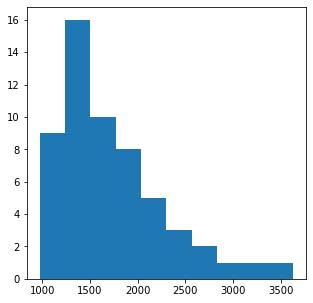

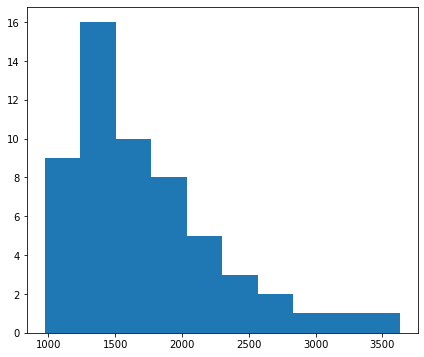

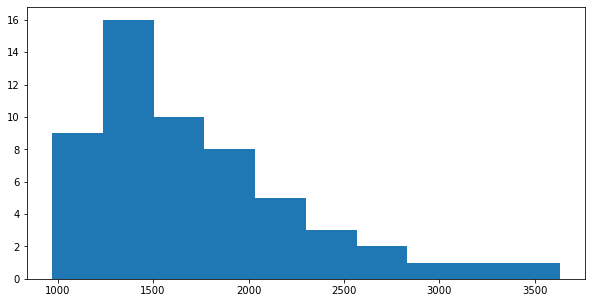

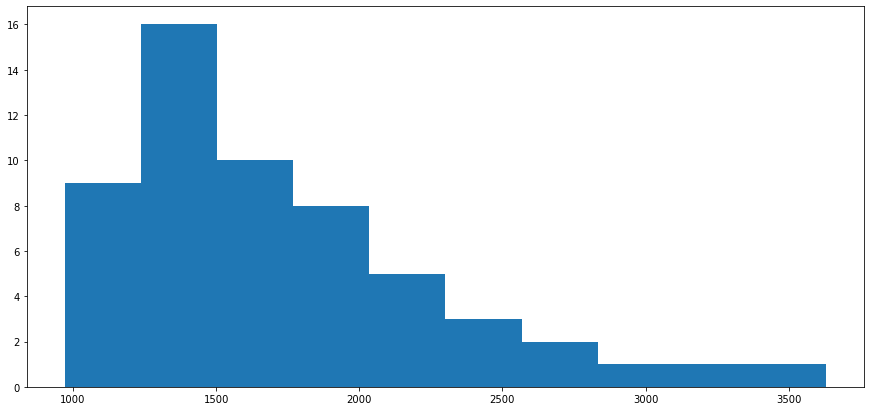

In [9]:
plt.figure(figsize=(5,5))
plt.hist(df_subsample['no_of_hits'])
plt.figure(figsize=(7,6))
plt.hist(df_subsample['no_of_hits'])
plt.figure(figsize=(10,5))
plt.hist(df_subsample['no_of_hits'])
plt.figure(figsize=(15,7))
plt.hist(df_subsample['no_of_hits'])


Plotting the histograms of the column hall_of_fame of the subsampled DataFrame and 
resizing the plot by changing the width and height of the plot

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

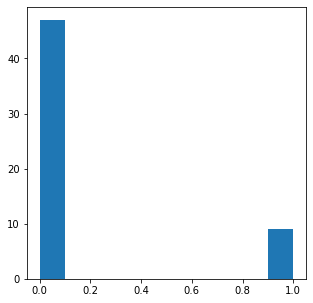

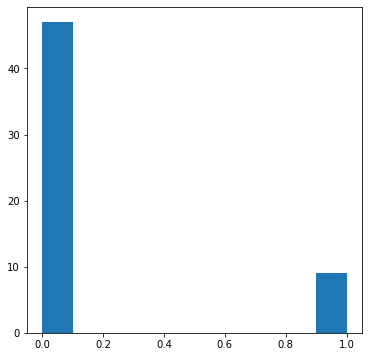

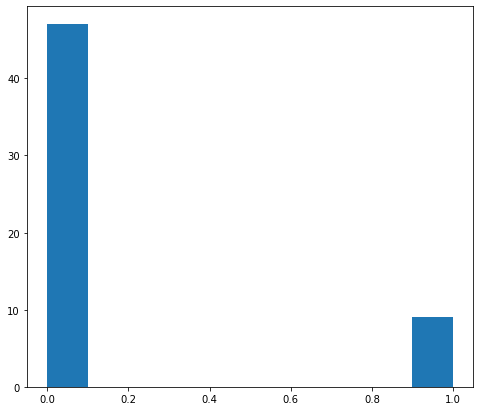

In [10]:
plt.figure(figsize=(5,5))
plt.hist(df_subsample['hall_of_fame'])
plt.figure(figsize=(6,6))
plt.hist(df_subsample['hall_of_fame'])
plt.figure(figsize=(8,7))
plt.hist(df_subsample['hall_of_fame'])


Next, use seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function instead, which accepts a pandas DataFrame as the data.  Show the number of hits and the counts of whether the player is in the hall of fame separately.  Which parameter can you pass into `histplot()` to make it so the gap between 0 and 1 in the "HOF" data does not appear?

Using seaborn's histplot() function plotting the column no_of_hits and hall_of_fame of the subsampled DataFrame seperately

<AxesSubplot:xlabel='hall_of_fame', ylabel='Count'>

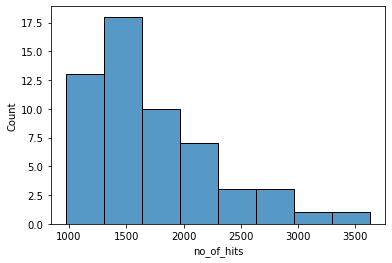

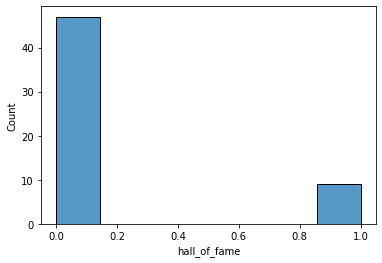

In [11]:
plt.figure()
sns.histplot(df_subsample['no_of_hits'])

plt.figure()
sns.histplot(df_subsample['hall_of_fame'])

To remove the gap between 0 and 1 in the plot of hof, I used bins=2 inside the histplot function

<AxesSubplot:xlabel='hall_of_fame', ylabel='Count'>

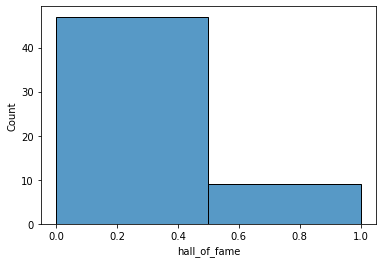

In [12]:
plt.figure()
sns.histplot(df_subsample['hall_of_fame'], bins=2)

We can also use binwidth in the histplot function to remove the gap between 0 and 1

<AxesSubplot:xlabel='hall_of_fame', ylabel='Count'>

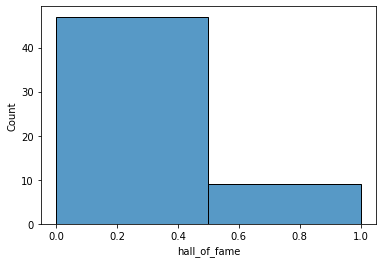

In [13]:
plt.figure()
sns.histplot(df_subsample['hall_of_fame'], binwidth = 0.5)

## Section 2: Dataset Analysis

Now, let's start analyzing our dataset and see if we can draw some conclusions!  For the rest of this section, you will add your own cells (either Markdown or Code) to show your analysis code and discuss your results.

**Write and discuss the steps to answering the following research question:** For the subsampled dataset, is having more hits than the mean number of hits more likely to achieve "hall of fame" status than random chance?

You will be graded on the following criteria:
- 25% statistical analysis is backed with reasoning and tests/scores
- 50% Python code is correct, logical, readable, and not excessive
- 25% clear writing and flow of the this section of the Jupyter notebook

Make sure you write down the reasoning and method of creation for any additional columns you need to create.

Now, creating a new column for the possible hall of fame achieved having more hits than mean number.

In [17]:
mean_hits = df_subsample['no_of_hits'].mean()
df_subsample['hof_achieved_for_more_than_mean_hits'] = ((df_subsample['no_of_hits'] > mean_hits) & (df_subsample['hall_of_fame'])).astype('int')
df_subsample = df_subsample[['no_of_hits', 'hall_of_fame', 'hof_achieved_for_more_than_mean_hits']]
print(df_subsample.head())

    no_of_hits  hall_of_fame  hof_achieved_for_more_than_mean_hits
0          972             0                                     0
14        1068             0                                     0
28        1105             0                                     0
42        1132             0                                     0
56        1154             0                                     0


Let's compute the standardized statistics Z_1 for the mean of hall of fame achieved for more than mean no. of hits, to see if there is a difference between having more hits than mean number and random chance to achieve 'hall of fame' status.

In [18]:
mean_hall_of_fame = df_subsample['hof_achieved_for_more_than_mean_hits'].mean()  # model sample mean
null_mean = 0.5  # chance model
null_std = np.sqrt(null_mean * (1 - null_mean) / df_subsample['hof_achieved_for_more_than_mean_hits'].count())

z_1 = (mean_hall_of_fame - null_mean) / null_std
print(f"Z-score for difference of having more hits than mean number and random chance to achieve hall of fame status: {z_1}")


Z-score for difference of having more hits than mean number and random chance to achieve hall of fame status: -5.3452248382484875


It looks like the Z-score for hall of fame achieved for more hits than mean number is statistically significant because the z-score is quite large (larger than +/-2). So having more hits than the mean number of hits is more likely to achieve "hall of fame" status than random chance.